<h1 align=center > Loan Eligibility Analysing and Predicting </h1>

In [2]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('data/loan_data_set.csv')
df.sample(10)

Loan_ID  Gender Married Dependents     Education Self_Employed  \
29   LP001087  Female      No          2      Graduate           NaN   
442  LP002418    Male      No         3+  Not Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
399  LP002287  Female      No          0      Graduate            No   
146  LP001516  Female     Yes          2      Graduate            No   
601  LP002950    Male     Yes          0  Not Graduate           NaN   
272  LP001892    Male      No          0      Graduate            No   
434  LP002390    Male      No          0      Graduate            No   
476  LP002529    Male     Yes          2      Graduate            No   
49   LP001151  Female      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
29              3750             2083.0       120.0             360.0   
442             4707             1993.0       148.0             360.0   
610             4106                0.0        40.0             180.0   
399             1500             1800.0       103.0             360.0   
146            14866                0.0        70.0             360.0   
601             2894             2792.0       155.0             360.0   
272             2833             1857.0       126.0             360.0   
434             3750                0.0       100.0             360.0   
476             6700             1750.0       230.0             300.0   
49              4000             2275.0       144.0             360.0   

     Credit_History Property_Area Loan_Status  
29              1.0     Semiurban           Y  
442             1.0     Semiurban           Y  
610             1.0         Rural           Y  
399             0.0     Semiurban           N  
146             1.0         Urban           Y  
601             1.0         Rural           Y  
272             1.0         Rural           Y  
434             1.0         Urban           Y  
476             1.0     Semiurban           Y  
49              1.0     Semiurban           Y

### Dimension of data

In [4]:
df.shape

(614, 13)

### How Many Null Values?

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### What type of data is?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Data Cleaning

In [7]:
df.drop(columns=['Loan_ID'],inplace=True)
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

### Separate out Categorical and Numerical Features

In [8]:
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns : ", cat_cols)

Categorical columns :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [9]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns : ", num_cols)

Numerical columns :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [10]:
num_df = df[num_cols]
num_df.sample(5)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
130            20166                0.0       650.0             480.0   
336             5250              688.0       160.0             360.0   
536             6133             3906.0       324.0             360.0   
351             8750             4167.0       308.0             360.0   
459             8334                0.0       160.0             360.0   

     Credit_History  
130             NaN  
336             1.0  
536             1.0  
351             1.0  
459             1.0

In [11]:
cat_df = df[cat_cols]
cat_df.sample(5)

Gender Married Dependents     Education Self_Employed Property_Area  \
592    NaN      No         3+      Graduate           Yes     Semiurban   
74    Male     Yes         3+      Graduate           Yes     Semiurban   
550   Male     Yes          2      Graduate           Yes         Rural   
44    Male     Yes          0  Not Graduate           Yes         Urban   
212   Male     Yes          1      Graduate           Yes         Urban   

    Loan_Status  
592           Y  
74            Y  
550           N  
44            Y  
212           Y

<h1 align=center > Exploratory Data Analysis </h1>

### Univariate EDA

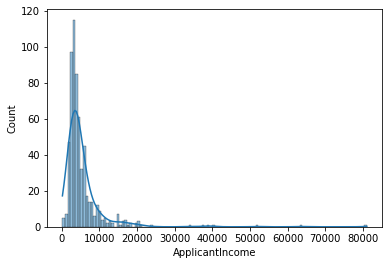

In [12]:
sns.histplot(df['ApplicantIncome'],kde=True);

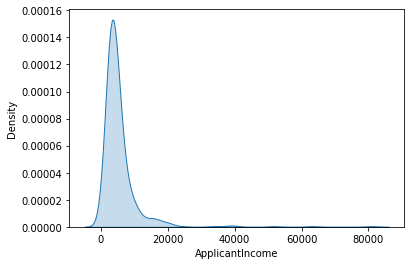

In [13]:
sns.kdeplot(df['ApplicantIncome'],fill=True);

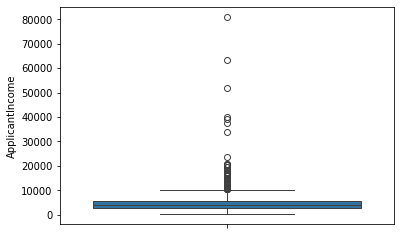

In [14]:
sns.boxplot(df['ApplicantIncome']);

In [15]:
df['ApplicantIncome'].skew()

6.539513113994625

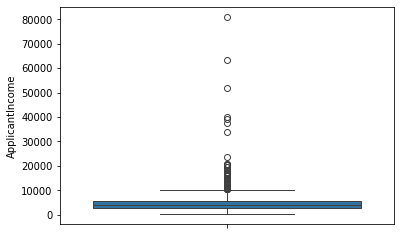

In [16]:
sns.boxplot(num_df.iloc[:,0]);

In [17]:
len(num_df.columns)

5

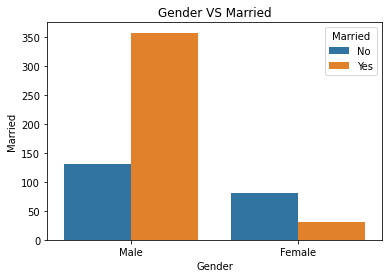

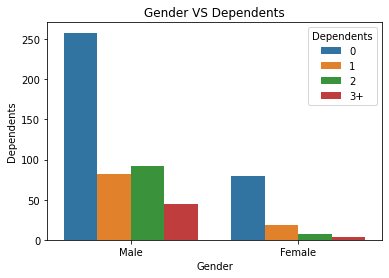

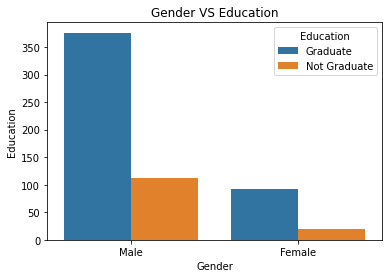

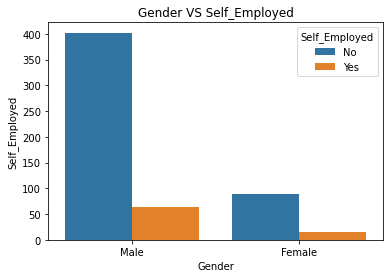

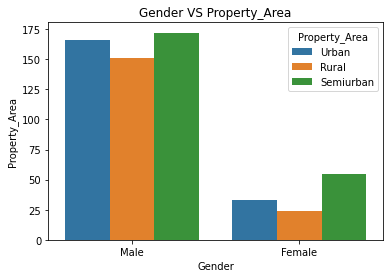

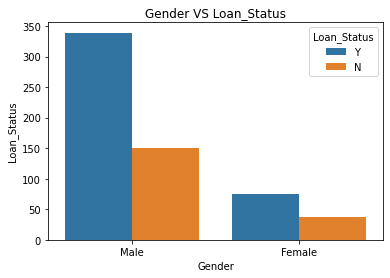

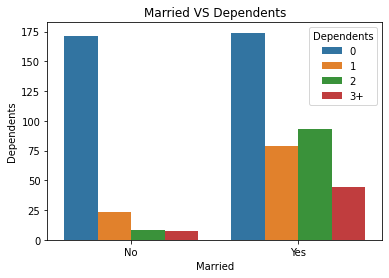

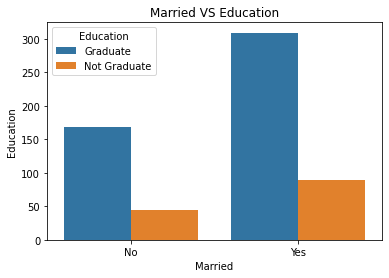

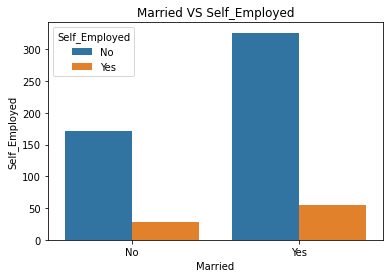

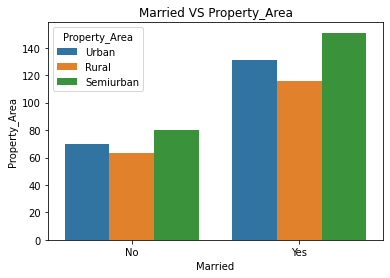

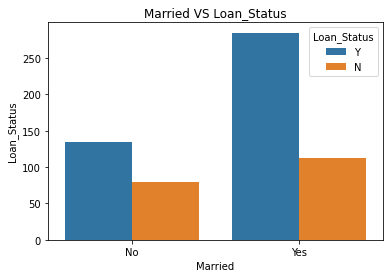

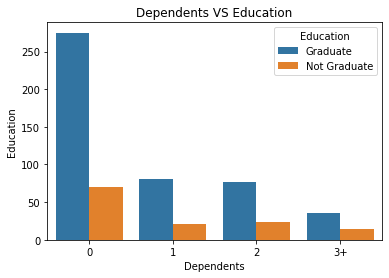

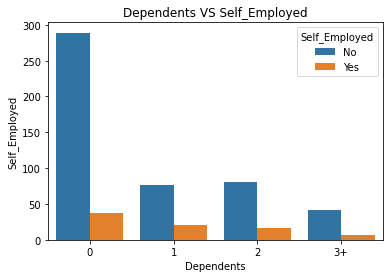

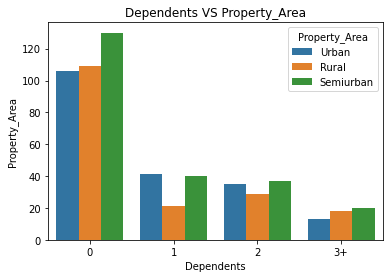

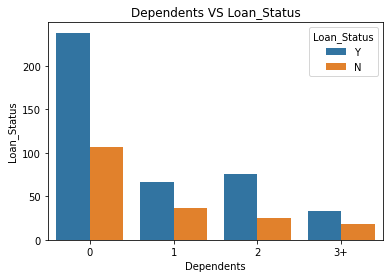

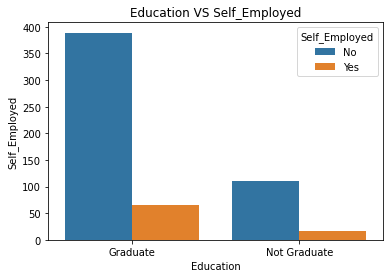

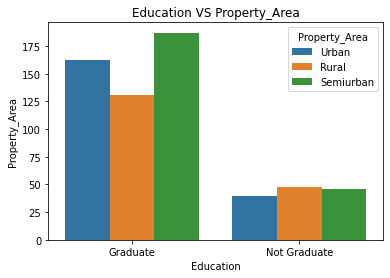

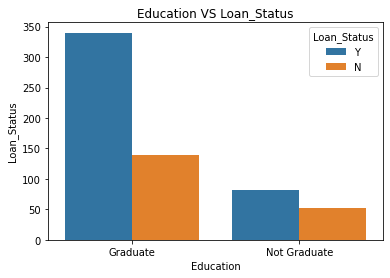

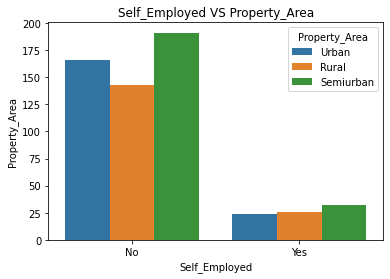

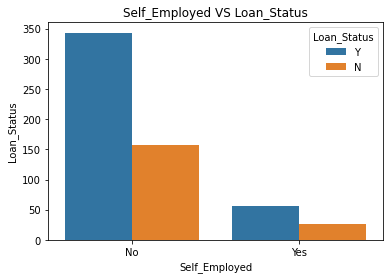

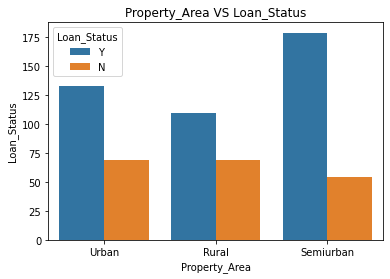

In [18]:
for row in range(len(cat_df.columns)-1):
    for col in range(row+1, len(cat_df.columns)):
        sns.countplot(x=cat_df.iloc[:, row], hue=cat_df.iloc[:, col])
        plt.xlabel(cat_df.columns[row])
        plt.ylabel(cat_df.columns[col])
        plt.title(f'{cat_df.columns[row]} VS {cat_df.columns[col]}')
        plt.show()